In [1]:
DATA_PATH = 'data/preprocessed.pkl'

In [72]:
# import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.utils import resample

import pickle

In [73]:
data = pd.read_pickle(DATA_PATH)

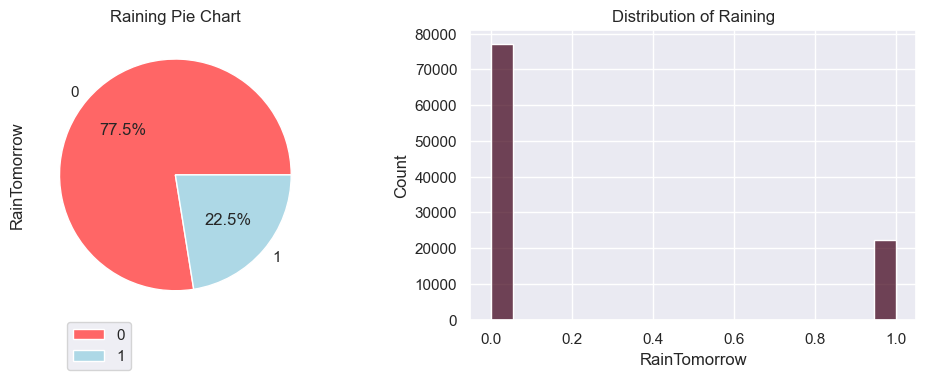

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data["RainTomorrow"], ax=axes[1],color="#450920")
axes[1].set_title("Distribution of Raining")
data['RainTomorrow'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%',colors=['#FF6666','#ADD8E6'])
axes[0].set_title("Raining Pie Chart")
axes[0].legend(data['RainTomorrow'].value_counts().index, loc = 'lower left',bbox_to_anchor=(0.1, -0.2))

plt.tight_layout()
plt.show()

In [75]:
data['RainTomorrow'].value_counts()

0    77157
1    22359
Name: RainTomorrow, dtype: int64

## _Resampling data_

In [76]:
count_0, count_1 = data['RainTomorrow'].value_counts()

class_0 = data[data['RainTomorrow']==0]
class_1 = data[data['RainTomorrow']==1]

samples_per_class = 25000


In [77]:
# upsample
upsampled_class_1 = resample(class_1,
                                replace=True,     # sample with replacement
                                n_samples=samples_per_class,  # match majority class
                                random_state=0)  # reproducible results

# downsample
downsampled_class_0 = resample(class_0,
                                replace=True,     # sample with replacement
                                n_samples=samples_per_class,  # match majority class
                                random_state=0)  # reproducible results

data = pd.concat([upsampled_class_1, downsampled_class_0])
data 

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
13260,0.541667,0.438679,0.390805,0.060377,0.055684,0.579310,0.5000,0.713178,0.5000,0.5000,...,0.77,0.67,0.558678,0.618893,0.555556,0.555556,0.453390,0.405405,0.5,1
48194,0.416667,0.462264,0.396552,0.053369,0.062645,0.220690,0.7500,0.240310,0.6250,0.6875,...,0.99,0.70,0.540496,0.576547,0.888889,0.777778,0.383475,0.393822,0.5,1
44027,0.395833,0.535377,0.490421,0.000000,0.062645,0.131034,0.3125,0.542636,0.1875,0.1875,...,0.49,0.71,0.634711,0.614007,0.777778,0.777778,0.514831,0.420849,0.0,1
86772,0.750000,0.195755,0.509579,0.000000,0.055684,0.579310,0.2500,0.186047,0.2500,0.3125,...,0.62,0.27,0.614876,0.604235,0.555556,0.555556,0.419492,0.521236,0.0,1
57480,0.145833,0.669811,0.609195,0.015094,0.051044,0.427586,0.0625,0.224806,0.1250,0.1250,...,0.69,0.59,0.649587,0.640065,0.777778,0.777778,0.669492,0.602317,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51724,0.687500,0.391509,0.411877,0.000000,0.055684,0.427586,0.5000,0.186047,0.1250,0.5625,...,0.72,0.59,0.771901,0.741042,0.777778,0.555556,0.430085,0.407336,0.0,0
23275,0.791667,0.686321,0.534483,0.000000,0.092807,0.055172,0.5000,0.271318,0.5000,0.5625,...,0.69,0.56,0.626446,0.640065,0.888889,0.888889,0.601695,0.554054,0.0,0
92584,0.354167,0.132075,0.270115,0.000809,0.055684,0.579310,0.5625,0.054264,1.0000,0.4375,...,0.97,0.51,0.614876,0.604235,0.555556,0.555556,0.139831,0.285714,0.0,0
22547,0.770833,0.450472,0.477011,0.000000,0.032483,0.634483,0.9375,0.325581,0.8125,0.5000,...,0.48,0.43,0.649587,0.662866,0.333333,0.555556,0.457627,0.455598,0.0,0


In [78]:
data.shape 

(50000, 22)

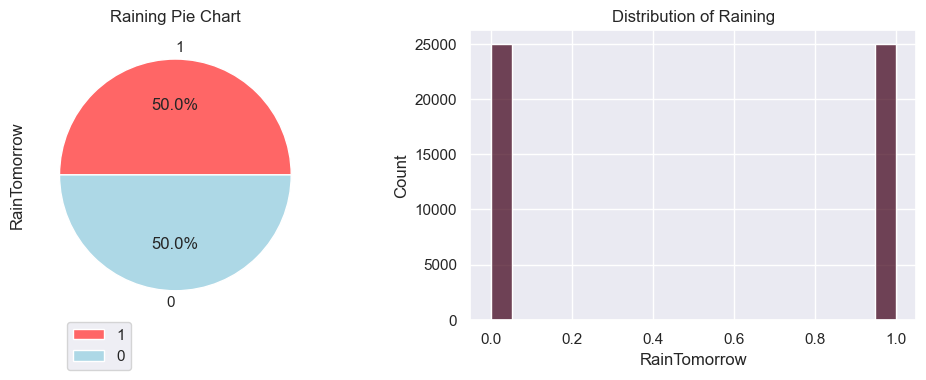

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data["RainTomorrow"], ax=axes[1],color="#450920")
axes[1].set_title("Distribution of Raining")
data['RainTomorrow'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%',colors=['#FF6666','#ADD8E6'])
axes[0].set_title("Raining Pie Chart")
axes[0].legend(data['RainTomorrow'].value_counts().index, loc = 'lower left',bbox_to_anchor=(0.1, -0.2))

plt.tight_layout()
plt.show()

In [80]:
data.to_pickle(DATA_PATH)